After this below comment , consider to restart the notebook or your virtual environment, if you face issue to import the same

In [ ]:
!pip3 install auto-sklearn

In [9]:
import autosklearn
import autosklearn.regression as reg

**Download this data from the [link ](https://docs.google.com/spreadsheets/d/1caaR9pT24GNmq3rDQpMiIMJrmiTGarbs/edit#gid=1150341366) as CSV and upload it the colab files**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

**Importing the data**

In [11]:
df = pd.read_csv("data.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


# **Exploratory Data Analysis**

**Checking the coorelation between price and Integer and Float variables**

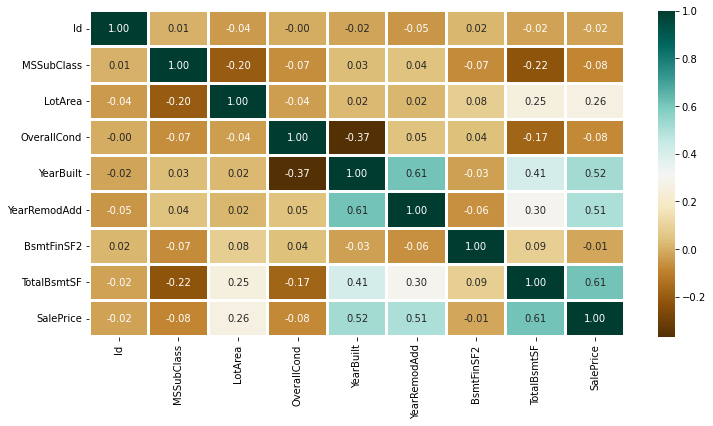

In [12]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

**Check coorelation of MSZoning LotConfig	BldgType Exterior1st respectively with respect to the price**

MSZoning - 	Identifies the general zoning classification of the sale.

LotConfig	- Configuration of the lot

BldgType -	Type of dwelling

Exterior1st	- Exterior covering on house

<function matplotlib.pyplot.show(*args, **kw)>

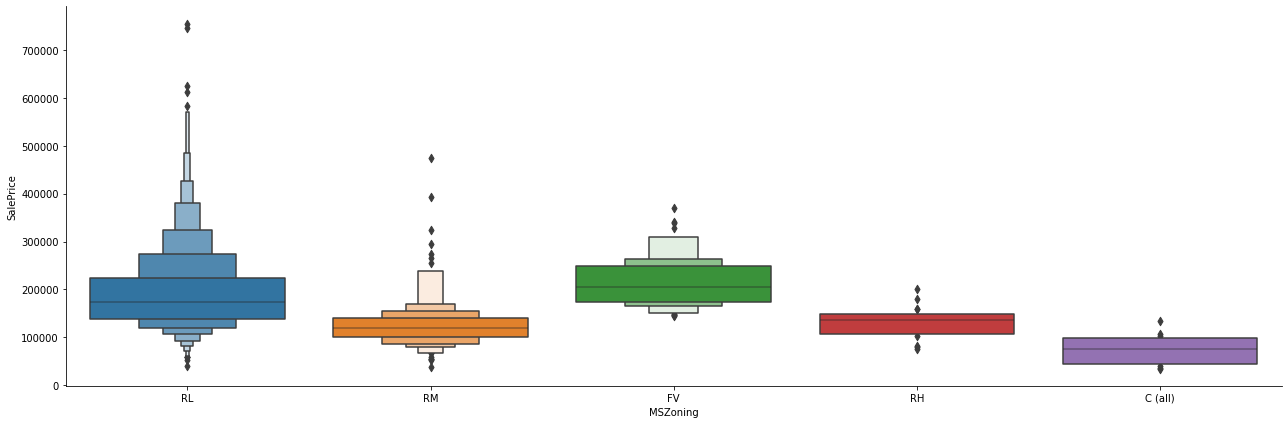

In [13]:
sns.catplot(y='SalePrice',x='MSZoning',data= df.sort_values('SalePrice',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

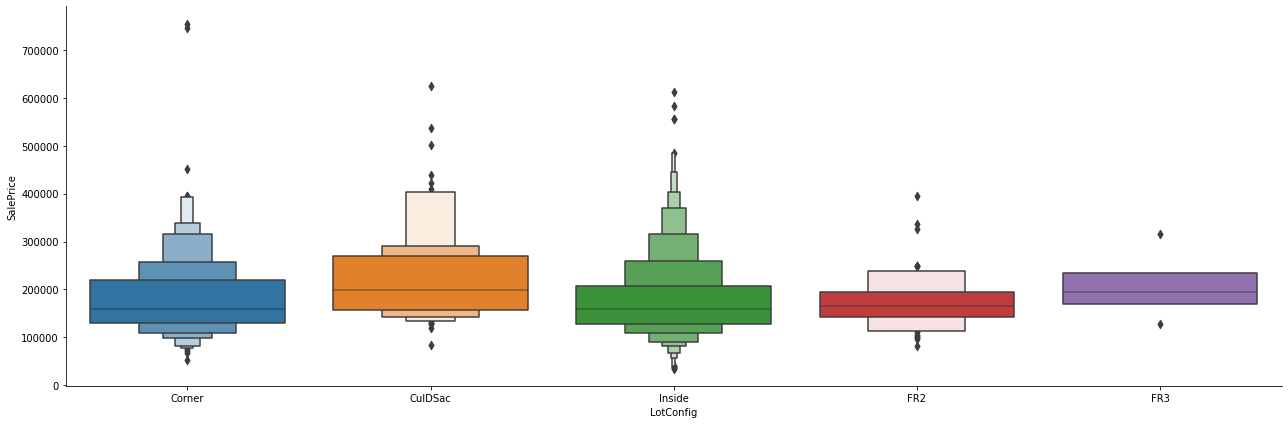

In [14]:
sns.catplot(y='SalePrice',x='LotConfig',data= df.sort_values('SalePrice',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

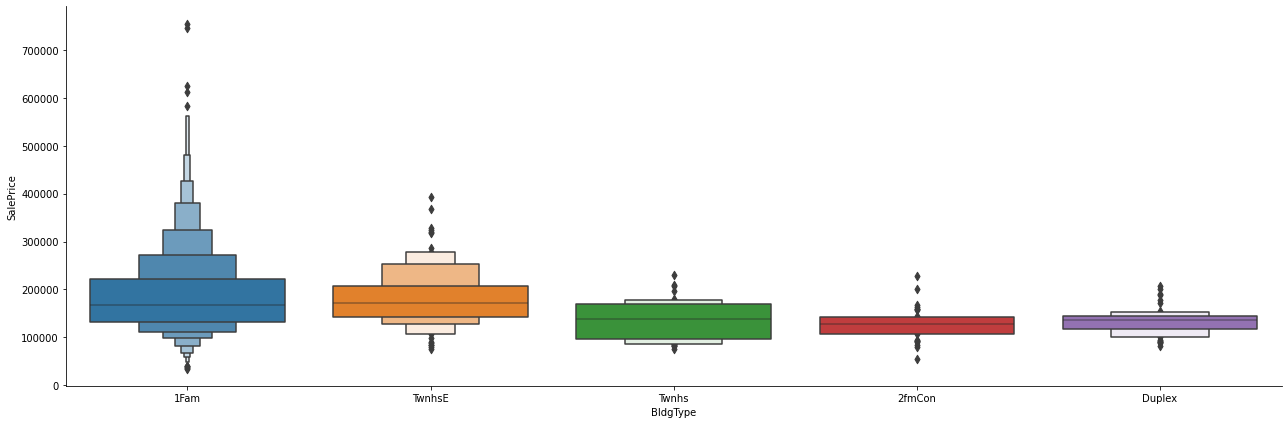

In [15]:
sns.catplot(y='SalePrice',x='BldgType',data= df.sort_values('SalePrice',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

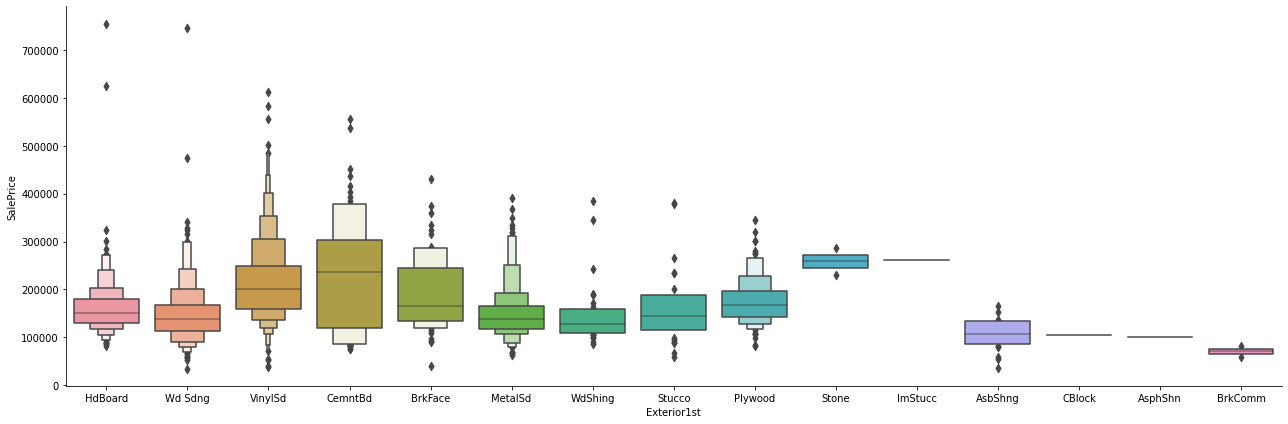

In [16]:
sns.catplot(y='SalePrice',x='Exterior1st',data= df.sort_values('SalePrice',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

**Saleprice empty values fill with the mean (If any) Otherwise the data becomes too small around ~1.4K**

In [17]:
df['SalePrice'] = df['SalePrice'].fillna(df['SalePrice'].mean())

**Drop All the null variables**

In [18]:
print(df.shape)
df = df.dropna()
print(df.shape)
print(df.isnull().sum())

(2919, 13)
(2913, 13)
Id              0
MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64


**Label Encoder For all the below labels**

MSZoning - 	Identifies the general zoning classification of the sale.

LotConfig	- Configuration of the lot

BldgType -	Type of dwelling

Exterior1st	- Exterior covering on house

In [19]:
le= LabelEncoder()
df["MSZoning"]=le.fit_transform(df['MSZoning'])
df["LotConfig"]=le.fit_transform(df['LotConfig'])
df["BldgType"]=le.fit_transform(df['BldgType'])
df["Exterior1st"]=le.fit_transform(df['Exterior1st'])
df.head()

<ipython-input-19-5e302cb5da46>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MSZoning"]=le.fit_transform(df['MSZoning'])
<ipython-input-19-5e302cb5da46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["LotConfig"]=le.fit_transform(df['LotConfig'])
<ipython-input-19-5e302cb5da46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0,208500.0
1,1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0,181500.0
2,2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0,223500.0
3,3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0,140000.0
4,4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0,250000.0


**Drop Id from the df**

In [20]:
df=df.drop(['Id'],axis=1)
df.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0,208500.0
1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0,181500.0
2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0,223500.0
3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0,140000.0
4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0,250000.0


# **Feature Selection and Test Train Split**

In [21]:
y= df['SalePrice']
x= df.drop(['SalePrice'],axis=1)
x.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
0,60,3,8450,4,0,5,2003,2003,12,0.0,856.0
1,20,3,9600,2,0,8,1976,1976,8,0.0,1262.0
2,60,3,11250,4,0,5,2001,2002,12,0.0,920.0
3,70,3,9550,0,0,5,1915,1970,13,0.0,756.0
4,60,3,14260,2,0,5,2000,2000,12,0.0,1145.0


In [22]:
y.head()

0    208500.0
1    181500.0
2    223500.0
3    140000.0
4    250000.0
Name: SalePrice, dtype: float64

**Split x and y into test and train**

Taking 80% For the train and 20% for the test

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(x,y, train_size=0.8, test_size=0.2, random_state=0)

# **Auto ML Model Creation**
[Learn More](https://automl.github.io/auto-sklearn/master/examples/20_basic/example_regression.html)


In [43]:
automl = reg.AutoSklearnRegressor(time_left_for_this_task=360,per_run_time_limit=30)
automl.fit(X_train,Y_train)
print(automl.leaderboard())

          rank  ensemble_weight               type      cost   duration
model_id                                                               
28           1             0.26        extra_trees  0.643449   2.555239
9            2             0.12        extra_trees  0.654096  12.681740
2            3             0.14      random_forest  0.669614   4.983719
23           4             0.18        extra_trees  0.672321   3.420739
4            5             0.04        extra_trees  0.678695  12.617325
19           6             0.22     ard_regression  0.717875   1.642875
11           7             0.04  gradient_boosting  0.723994  18.389522


In [47]:
from sklearn import metrics
import numpy as np
ypred1= automl.predict(X_train)
ypred2= automl.predict(X_valid)
train_predictions = automl.predict(X_train)
print("Train R2 score:", metrics.r2_score(Y_train, ypred1))
test_predictions = automl.predict(X_valid)
print("Test R2 score:", metrics.r2_score(Y_valid, ypred2))

Train R2 score: 0.6594585378035027
Test R2 score: 0.41381683017966386


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


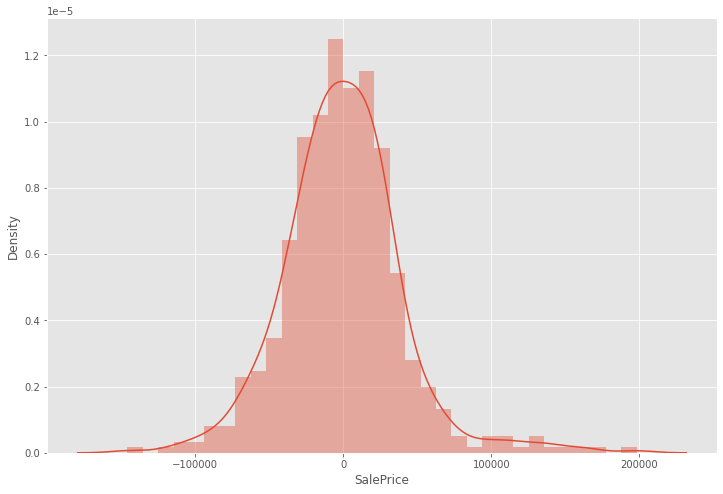

In [48]:
plt.style.use("ggplot")
plt.figure(figsize=(12,8))
sns.distplot(Y_valid-ypred2)
plt.show()

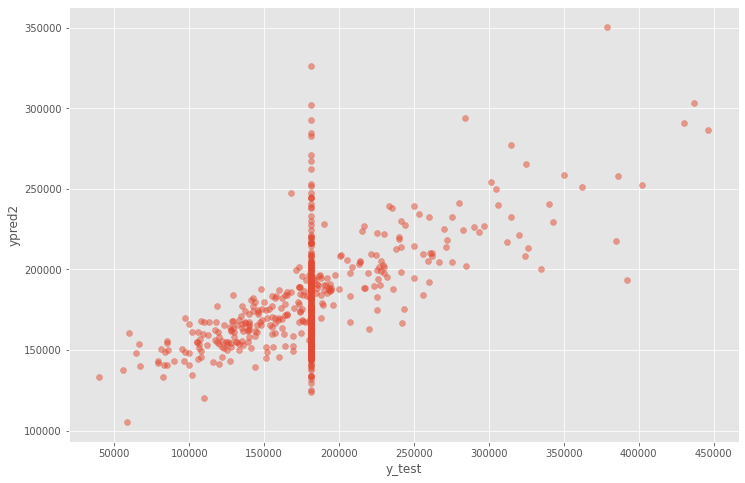

In [49]:
plt.figure(figsize=(12,8))
plt.style.use("ggplot")
plt.scatter(Y_valid, ypred2, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("ypred2")
plt.show()

# **Trying With SVM – Support vector Machine model**

In [50]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18705129344734908


# **Trying With Linear Regression**

In [51]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)

0.19623796450820097